# INTELLIHACK 5.0 Task - 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [3]:
data = pd.read_csv('weather_data.csv')
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

In [6]:
rain_or_not_map = {'Rain': 1, 'No Rain': 0}
data['rain_or_not'] = data['rain_or_not'].map(rain_or_not_map)
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day,month
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,1
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,2,1
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,3,1
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,4,1
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,5,1
...,...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875,3,11
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410,4,11
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431,5,11
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269,6,11


In [7]:
missing_values = data.isnull().sum()
missing_values_by_rain = data.groupby('rain_or_not').apply(lambda x: x.isnull().sum())
missing_values_by_rain

/var/folders/lt/y3jky1md7pb_wvwzblnhhmyh0000gn/T/ipykernel_935/1768308691.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_rain = data.groupby('rain_or_not').apply(lambda x: x.isnull().sum())


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day,month
rain_or_not,,,,,,,,,
0,0,6,6,6,0,6,0,0,0
1,0,9,9,9,0,9,0,0,0


There are 6 `No Rain` missing values and 9 `Rain` missing values. Because of the limited no. of datapoints the na values will be filled 

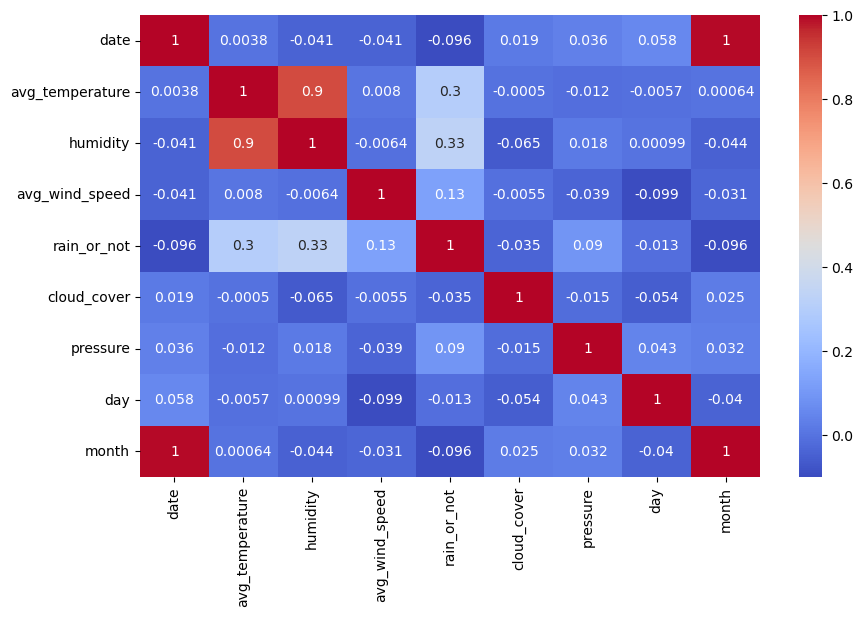

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

We can observe some high co-linearity between avg_temperatures and humidity. But there are no high co-relations between the target variable and features.

We can the use the relationship between `pressure` to other features fill the missing values instead of forward filling or using other means like `mean` or `median`. When going through the dataset we can identify there are instances of `Rain` after `No Rain` and vice versa because of the feature.

In [9]:
from sklearn.linear_model import LinearRegression

cols_to_fill = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

for col in cols_to_fill:
    known = data[data[col].notna()]
    missing = data[data[col].isna()]

    model = LinearRegression()
    model.fit(known[['pressure']], known[col])

    data.loc[data[col].isna(), col] = model.predict(missing[['pressure']])

In [10]:
data

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day,month
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,1
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,2,1
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,3,1
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,4,1
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,5,1
...,...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875,3,11
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410,4,11
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431,5,11
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269,6,11


In [11]:
missing_values = data.isnull().sum()

In [12]:
data['rain_or_not'].value_counts()

rain_or_not
1    198
0    113
Name: count, dtype: int64

We can see a class imbalance

## Model Training

In [13]:
X = data[['day', 'month', 'avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']]
y = data['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [15]:
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

In [16]:
models = [
    ("LogisticRegression", LogisticRegression(class_weight='balanced')),
    ("DecisionTree", DecisionTreeClassifier(class_weight='balanced')),
    ("RandomForest", RandomForestClassifier(class_weight='balanced')),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)),
    ("LightGBM", LGBMClassifier())
]

base_results = []
for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    clr = classification_report(y_test, preds)
    base_results.append((name, clr))

best_base_model, best_base_score = max(base_results, key=lambda x: x[1])

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/islp/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 157, number of negative: 91
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633065 -> initscore=0.545386
[LightGBM] [Info] Start training from score 0.545386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [17]:
for name, report in base_results:
    print(name)
    print(report)
    print('-' * 50)

LogisticRegression
              precision    recall  f1-score   support

           0       0.35      0.50      0.42        22
           1       0.66      0.51      0.58        41

    accuracy                           0.51        63
   macro avg       0.51      0.51      0.50        63
weighted avg       0.55      0.51      0.52        63

--------------------------------------------------
DecisionTree
              precision    recall  f1-score   support

           0       0.43      0.41      0.42        22
           1       0.69      0.71      0.70        41

    accuracy                           0.60        63
   macro avg       0.56      0.56      0.56        63
weighted avg       0.60      0.60      0.60        63

--------------------------------------------------
RandomForest
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        22
           1       0.74      0.76      0.75        41

    accuracy                       

In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
rf_preds = best_rf.predict(X_test)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.6535510204081633


In [21]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        22
           1       0.74      0.71      0.72        41

    accuracy                           0.65        63
   macro avg       0.62      0.63      0.62        63
weighted avg       0.66      0.65      0.65        63



## Deep Learning

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)

X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

2025-03-08 14:52:24.145282: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-08 14:52:24.145314: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-08 14:52:24.145318: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-08 14:52:24.145594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-08 14:52:24.145609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=16, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Accuracy:", accuracy)

/opt/anaconda3/envs/islp/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
